In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [130]:
df = pd.read_csv('datasets/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [128]:
df_new = df.drop(['Extracurricular Activities'], axis=1)
df_new.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


In [127]:
df_new.corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


In [131]:
x = df_new[['Hours Studied', 
                 'Previous Scores', 
                 'Sleep Hours', 
                 'Sample Question Papers Practiced']]

y = df_new['Performance Index']

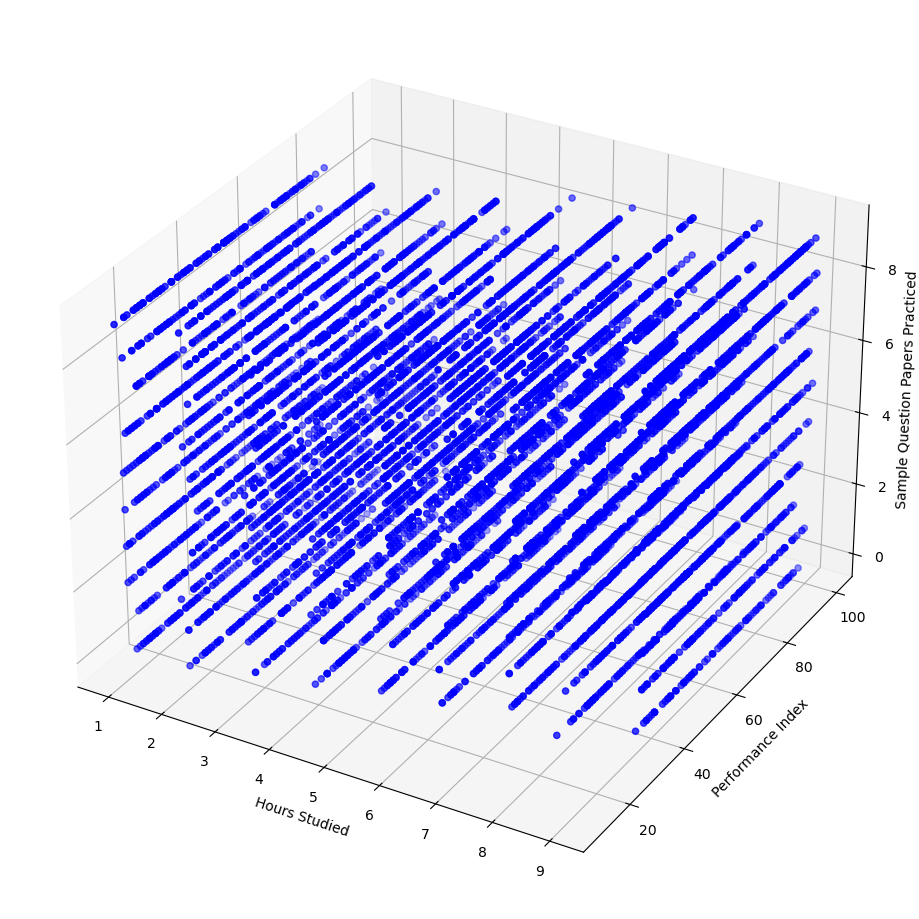

In [177]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_new['Hours Studied'], 
           df_new['Performance Index'], 
           df_new['Sample Question Papers Practiced'], 
           c='blue', 
           marker='o')

ax.set_xlabel('Hours Studied')
ax.set_ylabel('Performance Index')
ax.set_zlabel('Sample Question Papers Practiced', labelpad=0.1)

plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
plt.show()

In [90]:
lr_model = LinearRegression()
training = lr_model.fit(x, y)
training

LinearRegression()

In [91]:
coefficient = training.coef_
coefficient

array([2.85342921, 1.01858354, 0.47633298, 0.1951983 ])

In [92]:
intercept = training.intercept_
intercept

np.float64(-33.763726090794705)

In [93]:
yPredicted = training.predict(x)
pd.DataFrame(yPredicted)

,0
0,91.532244
1,63.469569
2,44.736196
3,36.241825
4,67.390699
...,...
9995,21.296025
9996,56.186280
9997,72.685938
9998,94.054071


In [101]:
single_row = x.iloc[[1]]
y_single_predict = training.predict(single_row)
y_single_predict

array([63.46956945])

In [110]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.20, random_state=40)
xTrain.shape

(8000, 4)

In [111]:
xTest.shape

(2000, 4)

In [113]:
model_train_eval = lr_model.fit(xTrain, yTrain)
model_train_eval

LinearRegression()

In [114]:
model_test_eval = lr_model.fit(xTest, yTest)
model_test_eval

LinearRegression()

In [115]:
score_train = model_test_eval.score(xTrain, yTrain)
score_train

0.9884946751907258

In [116]:
score_test = model_test_eval.score(xTest, yTest)
score_test

0.9884364085108218